In [15]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset



In [17]:
file_path = "/content/vehicle_emissions.csv"
df = pd.read_csv(file_path)

# Display first few rows
print("First 5 rows:")
print(df.head())

# Check structure and missing values
print("\nDataset Info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())

First 5 rows:
   engine_size fuel_type  co2_emissions emission_category
0     1.887889    petrol     215.413794                 B
1     1.924299  electric     234.463942                 C
2     3.687571    diesel     180.042027                 A
3     1.078842    petrol     156.704264                 A
4     1.416434    diesel     269.166344                 A

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   engine_size        100 non-null    float64
 1   fuel_type          100 non-null    object 
 2   co2_emissions      100 non-null    float64
 3   emission_category  100 non-null    object 
dtypes: float64(2), object(2)
memory usage: 3.3+ KB
None

Missing values:
engine_size          0
fuel_type            0
co2_emissions        0
emission_category    0
dtype: int64


In [18]:
df.dropna(subset=['emission_category'], inplace=True)
df.fillna(method='ffill', inplace=True)

# Separate features and target
X = df.drop(columns=['emission_category'])
y = df['emission_category']

<ipython-input-18-5708c6514514>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [19]:
label_encoders = {}
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Encode the target variable
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)

# Train logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = log_reg.predict(X_test)


Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         5
           B       0.18      0.33      0.24         6
           C       0.33      0.33      0.33         9

    accuracy                           0.25        20
   macro avg       0.17      0.22      0.19        20
weighted avg       0.20      0.25      0.22        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


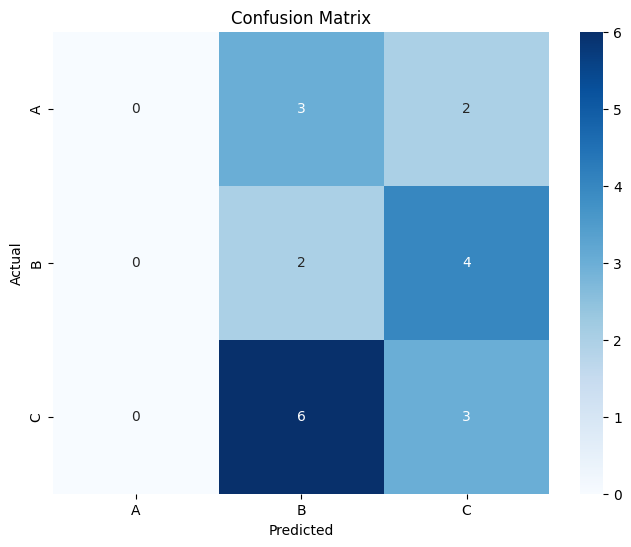


Prediction for sample 0: C


In [21]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le_target.classes_))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=le_target.classes_, yticklabels=le_target.classes_, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Sample prediction (first row)
sample = X.iloc[[0]]
sample_scaled = scaler.transform(sample)
sample_pred = log_reg.predict(sample_scaled)
predicted_label = le_target.inverse_transform(sample_pred)

print(f"\nPrediction for sample 0: {predicted_label[0]}")
